In [1]:
# fixes some matplotlib issues i was having that was killing the kernel
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# Reuters Dataset
Multiclass classification example

You’ll work with the Reuters dataset, a set of short newswires and their topics, published by Reuters in 1986. There are 46 topics, with some represented more than others (unbalanced dataset), but each topic has at least 10 examples.

In [2]:
from tensorflow.keras.datasets import reuters
import tensorflow as tf

import collections

### Load data

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000) # 10k most frequently occurring words

In [4]:
train_data.shape

(8982,)

In [5]:
print(len(train_data))
print(len(test_data))

8982
2246


In [6]:
# again words have been mapped to integers. samples are sequences of integers. word indices
# train_data[0]

In [7]:
# topics
print(max(train_labels))
print(min(train_labels))

45
0


In [8]:
# counts per topic
collections.Counter(train_labels)

Counter({3: 3159,
         4: 1949,
         16: 444,
         19: 549,
         8: 139,
         21: 100,
         11: 390,
         1: 432,
         13: 172,
         20: 269,
         18: 66,
         25: 92,
         35: 10,
         9: 101,
         38: 19,
         10: 124,
         28: 48,
         2: 74,
         6: 48,
         12: 49,
         7: 16,
         30: 45,
         34: 50,
         15: 20,
         14: 26,
         32: 32,
         41: 30,
         40: 36,
         45: 18,
         23: 41,
         42: 13,
         26: 24,
         24: 62,
         37: 19,
         27: 15,
         31: 39,
         39: 24,
         0: 55,
         22: 15,
         33: 11,
         36: 49,
         17: 39,
         43: 21,
         29: 19,
         44: 12,
         5: 17})

### Preparing data
Encoding

In [9]:
import numpy as np

In [10]:
# one-hot encoding
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # note the .
    return results

In [11]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
# need to one-hot encode the labels
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
# this look the same as above...

In [13]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [14]:
# built in way to do this in keras. probably faster too
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [15]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Building the network

In [17]:
# using more units per layer since we have more classes
from tensorflow.keras import models
from tensorflow.keras.layers import Dense

In [18]:
model = models.Sequential() # building sequentially vs functional API

model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax')) # number of classes. 46-dim output. add to 1. Outputs a probability distribution

In [19]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Validation set

In [20]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [22]:
one_hot_train_labels.shape

(8982, 46)

### Training

In [23]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
16/16 [==============================] - 2s 59ms/step - loss: 2.6564 - accuracy: 0.5599 - val_loss: 1.7456 - val_accuracy: 0.6460
Epoch 2/20
16/16 [==============================] - 1s 40ms/step - loss: 1.4000 - accuracy: 0.7077 - val_loss: 1.2969 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 1.0417 - accuracy: 0.7731 - val_loss: 1.1546 - val_accuracy: 0.7370
Epoch 4/20
16/16 [==============================] - 1s 42ms/step - loss: 0.8274 - accuracy: 0.8250 - val_loss: 1.0400 - val_accuracy: 0.7780
Epoch 5/20
16/16 [==============================] - 1s 74ms/step - loss: 0.6689 - accuracy: 0.8587 - val_loss: 0.9651 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 1s 40ms/step - loss: 0.5388 - accuracy: 0.8832 - val_loss: 0.9201 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 1s 40ms/step - loss: 0.4336 - accuracy: 0.9073 - val_loss: 0.8919 - val_accuracy: 0.8100
Epoch 8/20
16

### Loss

In [24]:
import matplotlib.pyplot as plt

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

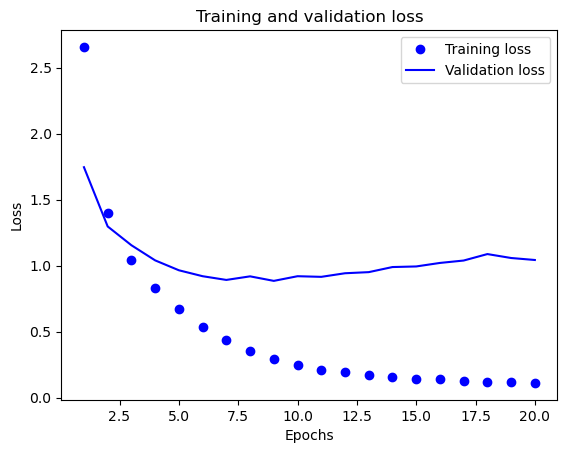

In [34]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

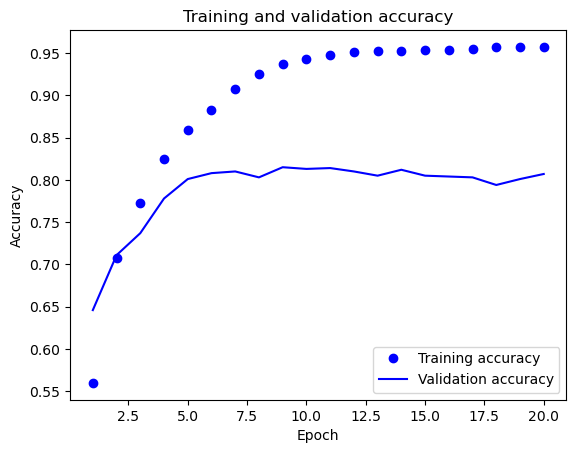

In [35]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [36]:
# model seems to be overfitting... so we will stop training after 9 epochs, where the accuracy seems to peak
model = models.Sequential()

model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# not taking history object here
model.fit(
    partial_x_train,
    partial_y_train,
    epochs=9,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/9
16/16 [==============================] - 2s 54ms/step - loss: 2.6921 - accuracy: 0.5189 - val_loss: 1.7637 - val_accuracy: 0.6400
Epoch 2/9
16/16 [==============================] - 1s 38ms/step - loss: 1.4423 - accuracy: 0.6959 - val_loss: 1.3211 - val_accuracy: 0.7140
Epoch 3/9
16/16 [==============================] - 1s 40ms/step - loss: 1.0595 - accuracy: 0.7731 - val_loss: 1.1450 - val_accuracy: 0.7480
Epoch 4/9
16/16 [==============================] - 1s 38ms/step - loss: 0.8249 - accuracy: 0.8217 - val_loss: 1.0113 - val_accuracy: 0.7820
Epoch 5/9
16/16 [==============================] - 1s 67ms/step - loss: 0.6564 - accuracy: 0.8618 - val_loss: 0.9499 - val_accuracy: 0.8090
Epoch 6/9
16/16 [==============================] - 1s 70ms/step - loss: 0.5218 - accuracy: 0.8890 - val_loss: 0.9267 - val_accuracy: 0.8050
Epoch 7/9
16/16 [==============================] - 1s 63ms/step - loss: 0.4242 - accuracy: 0.9079 - val_loss: 0.9009 - val_accuracy: 0.8110
Epoch 8/9
16/16 [===

In [37]:
# not taking predictions, just evaluating
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 1s 14ms/step - loss: 1.0166 - accuracy: 0.7832


In [38]:
results

[1.0166205167770386, 0.7831701040267944]

### Predictions here

In [39]:
predictions = model.predict(x_test)

71/71 [==============================] - 1s 15ms/step


In [40]:
predictions[0]

array([1.34774455e-05, 2.54642309e-05, 2.49335244e-06, 9.78472054e-01,
       1.81757975e-02, 1.40900886e-06, 3.83744691e-06, 2.15709042e-06,
       3.07870068e-04, 2.74255717e-06, 1.12851458e-05, 2.05235532e-03,
       4.55641384e-05, 5.61307534e-05, 1.91112267e-05, 6.82235532e-06,
       1.27987805e-04, 6.38581969e-06, 1.32929672e-05, 1.08789165e-04,
       1.46329709e-04, 1.93366159e-05, 1.14654131e-06, 6.43599924e-05,
       2.61097830e-06, 1.16286424e-06, 5.41130612e-06, 3.41491227e-06,
       1.86030320e-06, 4.03405720e-05, 2.68413678e-05, 2.09098198e-05,
       2.34771346e-06, 2.35257244e-06, 1.32666119e-05, 6.01982890e-08,
       1.19753931e-04, 7.98274982e-07, 5.16883074e-06, 2.92455461e-05,
       5.36981997e-06, 4.21850746e-06, 7.71117720e-06, 9.95454775e-06,
       1.06702037e-05, 3.47657988e-07], dtype=float32)

In [41]:
predictions[0].shape

(46,)

In [42]:
sum(predictions[0])

1.0000000180188806

In [43]:
np.sum(predictions[0])

1.0

In [44]:
# predictions
np.argmax(predictions[0])

3

### Different way to handle the labels
Mentioned earlier, instead of encoding them, we can just use them as integers (integer tensors). So instead of a distribution, the model will output digits. Actually, the only thing this would change is the loss function.

In [53]:
y_train_i = np.array(train_labels)[1000:]
y_test_i = np.array(test_labels)

In [63]:
model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [55]:
partial_x_train.shape

(7982, 10000)

In [56]:
y_train_i.shape

(7982,)

In [64]:
model.fit(
    partial_x_train,
    y_train_i,
    epochs=20,
    batch_size=512
)

Epoch 1/20
16/16 [==============================] - 2s 60ms/step - loss: 0.1223 - acc: 0.9578
Epoch 2/20
16/16 [==============================] - 1s 55ms/step - loss: 0.0938 - acc: 0.9593
Epoch 3/20
16/16 [==============================] - 1s 57ms/step - loss: 0.0903 - acc: 0.9603
Epoch 4/20
16/16 [==============================] - 1s 79ms/step - loss: 0.0901 - acc: 0.9570
Epoch 5/20
16/16 [==============================] - 1s 61ms/step - loss: 0.0901 - acc: 0.9589
Epoch 6/20
16/16 [==============================] - 1s 57ms/step - loss: 0.0873 - acc: 0.9605
Epoch 7/20
16/16 [==============================] - 1s 59ms/step - loss: 0.0924 - acc: 0.9585
Epoch 8/20
16/16 [==============================] - 1s 56ms/step - loss: 0.0875 - acc: 0.9593
Epoch 9/20
16/16 [==============================] - 0s 22ms/step - loss: 0.0880 - acc: 0.9589
Epoch 10/20
16/16 [==============================] - 1s 43ms/step - loss: 0.0859 - acc: 0.9598
Epoch 11/20
16/16 [==============================] - 1s 60m

In [59]:
predictions = model.predict(x_test)

71/71 [==============================] - 1s 16ms/step


In [65]:
predictions[0].shape

(46,)

In [66]:
predictions[0]

array([2.1296705e-06, 2.3365673e-07, 2.1252371e-08, 9.8763949e-01,
       1.0786966e-02, 5.8002952e-10, 8.6898533e-10, 2.8853637e-07,
       1.2950174e-04, 1.8153820e-07, 2.6941140e-07, 3.5980614e-04,
       3.2849305e-06, 2.1827123e-06, 4.2799974e-07, 9.5605901e-10,
       4.8761223e-05, 9.4784205e-08, 1.8083357e-07, 6.5444753e-04,
       2.5133099e-04, 1.5840085e-05, 2.5650255e-09, 2.9624673e-06,
       1.9098637e-08, 1.4148088e-08, 1.4779796e-09, 5.5241181e-08,
       5.7534970e-07, 1.5376834e-06, 2.8097365e-06, 2.0063118e-09,
       6.2376898e-07, 1.6364247e-08, 1.2957869e-06, 3.8623136e-09,
       9.3273404e-05, 4.3274677e-09, 1.0781422e-06, 8.5832752e-10,
       1.2420759e-07, 1.5986084e-08, 1.5112732e-08, 2.6345337e-08,
       6.4021420e-11, 2.6237608e-09], dtype=float32)

NN still has 46 layer output... hmm I guess the loss function kind of changes this so the output looks the same. Converts it somewhere in between.